#Autonomous Rocket Landing Using Reinforcement Learning (A2C)

Step 1

Installing Dependencies for Virtual Display and Recording the simulation.

In [1]:
!pip install swig


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.6 MB/s eta 0:00:00


In [2]:
%%bash

# install required system dependencies
apt-get install -y xvfb x11-utils

# install required python dependencies (might need to install additional gym extras depending)
pip install gym[box2d]==0.17.* pyvirtualdisplay==0.2.* PyOpenGL==3.1.* PyOpenGL-accelerate==3.1.*

Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 libxtst6 libxxf86dga1 x11-xkb-utils
  xfonts-base xfonts-encodings xfonts-utils xserver-common
Suggested packages:
  mesa-utils
The following NEW packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 libxtst6 libxxf86dga1 x11-utils
  x11-xkb-utils xfonts-base xfonts-encodings xfonts-utils xserver-common xvfb
0 upgraded, 12 newly installed, 0 to remove and 24 not upgraded.
Need to get 7,920 kB of archives.
After this operation, 12.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/main amd64 libfontenc1 amd64 1:1.1.4-0ubuntu1 [14.0 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/main amd64 libxfont2 amd64 1:2.0.3-1 [91.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/main amd64 libxkbfile1 amd64 1:1.1.0-1 [65.3 kB]
Get:4 http://archive.ubuntu.com/ubuntu focal/main amd6

In [3]:
!apt update && apt install xvfb 

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Get:3 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:4 http://archive.ubuntu.com/ubuntu focal InRelease
Get:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease [18.1 kB]
Get:6 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:7 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Get:8 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:9 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Get:10 http://security.ubuntu.com/ubuntu focal-security/main amd64 Packages [2,681 kB]
Get:11 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease [24.3 kB]
Get:12 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 Packages [1,343 kB]
Hit:13 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRele

Step 2

Installing dependencies for Stable Baselines 3 

In [4]:
!sudo apt-get update && sudo apt-get install cmake libopenmpi-dev python3-dev zlib1g-dev

Hit:1 http://security.ubuntu.com/ubuntu focal-security InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:5 http://archive.ubuntu.com/ubuntu focal InRelease
Hit:6 http://archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:7 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:8 http://archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:9 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Hit:10 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:11 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-dev is already the newest version (3.8.2-0ubuntu2).
python3-dev set to manually installed.
libo

In [ ]:
!pip install stable-baselines3[extra]

Step 3

Installing Dependencies for RL Environment

In [6]:
!pip install starship-landing-gym

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Ignored the following versions that require a different python version: 0.1.0 Requires-Python >=3.7.1,<3.10; 0.1.1 Requires-Python >=3.7.1,<3.10; 0.1.2 Requires-Python >=3.7.1,<3.10; 0.1.3 Requires-Python >=3.7.1,<3.10
ERROR: Could not find a version that satisfies the requirement starship-landing-gym (from versions: none)
ERROR: No matching distribution found for starship-landing-gym


Step 4: 

Initialize Virtual Display and Recorded Video Display Function

In [7]:
# Virtual display
import pyvirtualdisplay


_display = pyvirtualdisplay.Display(visible=False,  # use False with Xvfb
                                    size=(500, 400))
_ = _display.start()

In [8]:
import cv2
from IPython.display import display
from IPython.display import clear_output
from google.colab.patches import cv2_imshow

def display_video(path):
  cap = cv2.VideoCapture(path)
  while cap.isOpened():#while True:
    ok, frame = cap.read()

    if not ok:
      break
    if ok:
      #edit your video size here, to adjust the performance
      largura=frame.shape[1] 
      altura=frame.shape[0]
      lamenor=int(frame.shape[1]/2)
      altmenor=int(frame.shape[0]/2)
      frame = cv2.resize(frame, (lamenor,altmenor))

      # as you read
      clear_output(wait=True)
      cv2_imshow(frame)

    if cv2.waitKey(1100) & 0xFF == ord('q'):
      break

  cap.release()
  cv2.destroyAllWindows()

Step 5: 

Understanding Environment

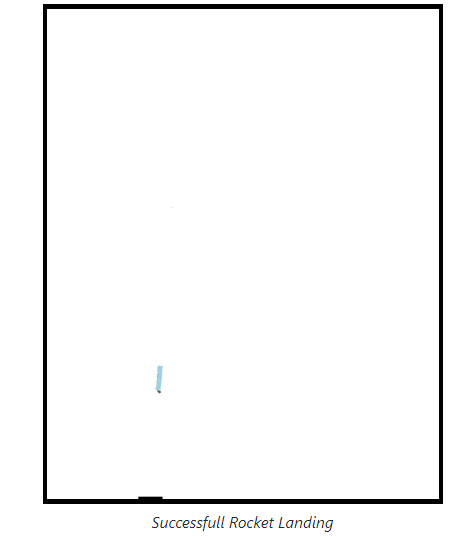

https://github.com/Armandpl/starship-landing-gym/ 

In [ ]:
import gym
import starship_landing_gym

In [ ]:
env = gym.make("StarshipLanding-v0")


Random State Observations and Visulaizations

In [ ]:
from gym import wrappers

In [ ]:
env = gym.make("StarshipLanding-v0")
env = wrappers.Monitor(env, "/tmp/StarshipLanding-Random_Check")

In [ ]:
episodes = 10
for episode in range(1, episodes+1):
    env.reset()
    done = False
    score = 0 
    
    while not done:
        env.render()
        action = env.action_space.sample()
        n_state, reward, done, info = env.step(action)
        score+=reward
    print('Episode:{} Score:{}'.format(episode, score))
env.close()

Episode:1 Score:-3.3895978020578914
Episode:2 Score:-2.4480988215792894
Episode:3 Score:-2.946626713746032
Episode:4 Score:-2.2280237720308245
Episode:5 Score:-3.8128574957054275
Episode:6 Score:-3.0874411669303994
Episode:7 Score:-3.23557428376221
Episode:8 Score:-3.645488873664413
Episode:9 Score:-2.856277166214251
Episode:10 Score:-2.585127705230846


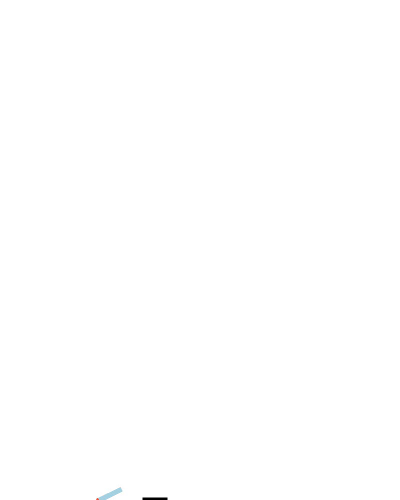

In [ ]:
display_video('/tmp/StarshipLanding-Random_Check/openaigym.video.0.5128.video000008.mp4')

Step 7: Build and Train the Model

In [ ]:
import gym
from stable_baselines3 import A2C

In [ ]:
env = gym.make("StarshipLanding-v0")


model = A2C("MultiInputPolicy", env, verbose=1)                  # learning_rate=0.0007, gamma=0.99
model.learn(total_timesteps=25_000)

/usr/local/lib/python3.8/dist-packages/gym/logger.py:34: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize("%s: %s" % ("WARN", msg % args), "yellow"))


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 129      |
|    ep_rew_mean        | -2.77    |
| time/                 |          |
|    fps                | 526      |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -2.85    |
|    explained_variance | 0.995    |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | -0.00143 |
|    std                | 1        |
|    value_loss         | 3.39e-07 |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 149      |
|    ep_rew_mean        | -2.8     |
| time/                 |          |
|    fps                | 539      |
|    iterations   

Step 8:

Save the Model

In [ ]:
model.save("A2C_model")

In [ ]:
del model

Step 9:

Load the Model and check the outcomes

In [ ]:
env = gym.make("StarshipLanding-v0")
env = wrappers.Monitor(env, "/tmp/StarshipLanding-Test7")

In [ ]:
model = A2C.load("/content/A2C_model.zip", env=env)

Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [ ]:
episodes = 10
for episode in range(1, episodes+1):
    obs = env.reset()
    done = False
    score = 0 
    
    while not done:
        env.render()
        action, _states = model.predict(obs)
        obs, reward, done, info = env.step(action)
        env.render()
        score+=reward
    print('Episode:{} Score:{}'.format(episode, score))

env.close()

Episode:1 Score:-3.2062662308301335
Episode:2 Score:-3.2648129567615065
Episode:3 Score:-1.6148118173376296
Episode:4 Score:-1.7376521660680415
Episode:5 Score:-2.7129509437476242
Episode:6 Score:-3.422977497466746
Episode:7 Score:-2.966706787851396
Episode:8 Score:-1.986767770220342
Episode:9 Score:-3.439756780725472
Episode:10 Score:-3.658046463807251


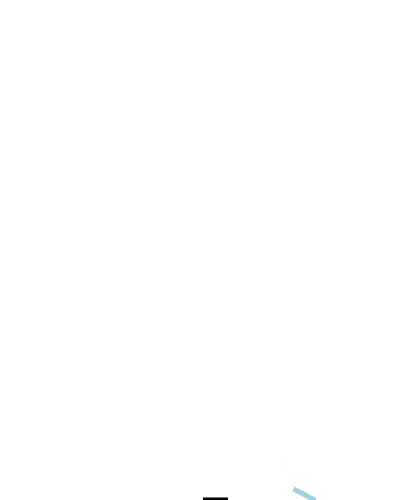

In [ ]:
display_video('/tmp/StarshipLanding-Test7/openaigym.video.6.5128.video000000.mp4')